# Установка PySpark

In [0]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [0]:
!wget -q www-us.apache.org/dist/spark/spark-2.4.3/spark-2.4.3-bin-hadoop2.7.tgz

In [5]:
!tar -xvf spark-2.4.3-bin-hadoop2.7.tgz

spark-2.4.3-bin-hadoop2.7/
spark-2.4.3-bin-hadoop2.7/python/
spark-2.4.3-bin-hadoop2.7/python/setup.cfg
spark-2.4.3-bin-hadoop2.7/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/resultiterable.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/
spark-2.4.3-bin-hadoop2.7/python/pyspark/python/pyspark/shell.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/heapq3.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/join.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/version.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/rdd.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/java_gateway.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/find_spark_home.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/_globals.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/worker.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/accumulators.py
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/
spark-2.4.3-bin-hadoop2.7/python/pyspark/mllib/feature.py
spark-2.4.3-bin-hadoop2.7/python/pyspark

In [0]:
!pip install -q findspark

In [0]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-2.4.3-bin-hadoop2.7"

In [0]:
import findspark
findspark.init()
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local[*]").getOrCreate()

# Загрузка данных из CSV

In [0]:
df_p = spark.read.csv('power.csv', inferSchema=True, header=True)

# Базовый обзор данных

In [43]:
df_p.count()

1189482

In [44]:
df_p.dtypes

[('country', 'string'),
 ('year', 'int'),
 ('quantity', 'double'),
 ('category', 'int')]

In [46]:
df_p.take(2)

[Row(country='Austria', year=1996, quantity=5.0, category=1),
 Row(country='Austria', year=1995, quantity=17.0, category=1)]

# Практика 1. Загрузите данные из файла transactions.csv. Выведите 10 первых строчек

In [0]:
df_t = spark.read.csv('transactions.csv', inferSchema=True, header=True)

In [139]:
df_t.show()
# df_t.take(10)

+----+-----+----+-------+------+-----+-----+----+
|Year|Month|  ID|Product|Amount|Price|Total|Cost|
+----+-----+----+-------+------+-----+-----+----+
|2017|    1|t001|     A1|     7| 2904|20328|1200|
|2017|    1|t002|     A2|     2| 1896| 3792|1100|
|2017|    2|t003|     A1|     5| 2904|14520|1200|
|2017|    2|t004|     A4|     1| 8618| 8618|4200|
|2017|    2|t005|     A5|     3| 5175|15525| 500|
|2017|    2|t006|     _6|     4| 3500|14000| 200|
|2017|    3|t007|     _3|     6| 1265| 7590| 200|
|2017|    3|t008|     _5|     2| 5175|10350|1200|
|2017|    4|t009|     _8|     3| 3760|11280|1000|
|2017|    4|t010|     _4|     2| 8618|17236|3400|
|2017|    4|t011|     _2|     4| 1896| 7584| 800|
|2017|    4|t012|     _5|     5| 5175|25875| 700|
|2017|    4|t013|     _8|     3| 3760|11280|1200|
|2017|    4|t014|     _4|     1| 8618| 8618| 250|
|2017|    5|t015|     _2|     2| 1896| 3792| 650|
|2017|    5|t016|     A4|     3| 8618|25854|2400|
|2017|    5|t017|     A5|     2| 5175|10350|1200|


In [54]:
df_t.dtypes

[('Year', 'int'),
 ('Month', 'int'),
 ('ID', 'string'),
 ('Product', 'string'),
 ('Amount', 'int'),
 ('Price', 'int'),
 ('Total', 'int'),
 ('Cost', 'int')]

# Выборки

In [58]:
# Выборка
df_lim = df_p.select('country', 'year', 'quantity')
df_lim.take(2)

[Row(country='Austria', year=1996, quantity=5.0),
 Row(country='Austria', year=1995, quantity=17.0)]

In [55]:
# Переименовать колонку
df_lim = df_lim.withColumnRenamed('year', 'y')
df_lim

DataFrame[country: string, y: int, quantity: double]

In [59]:
df_lim.columns

['country', 'year', 'quantity']

# Описание и статистики

In [60]:
df_lim.show()

+-------+----+--------+
|country|year|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
|Austria|1995|    17.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|    35.0|
|Belgium|2011|    25.0|
|Belgium|2010|    22.0|
|Belgium|2009|    45.0|
|Czechia|1998|     1.0|
|Czechia|1995|     7.0|
|Finland|2010|     9.0|
|Finland|2009|    13.0|
|Finland|2008|    39.0|
|Finland|2007|    21.0|
|Finland|2006|     0.0|
|Finland|2005|     0.0|
|Finland|2004|     0.0|
|Finland|2003|     0.0|
|Finland|2002|     0.0|
|Finland|2001|     0.0|
+-------+----+--------+
only showing top 20 rows



In [61]:
df_lim.describe().show()

+-------+-----------+------------------+-------------------+
|summary|    country|              year|           quantity|
+-------+-----------+------------------+-------------------+
|  count|    1189482|           1189482|            1189482|
|   mean|       null|2002.8515538696677|  184264.7700501277|
| stddev|       null| 7.167344581291811|1.585662814135995E7|
|    min|Afghanistan|              1990|          -864348.0|
|    max|   Zimbabwe|              2014|         6.680329E9|
+-------+-----------+------------------+-------------------+



# Сохранение

In [0]:
df_lim.write.format('com.databricks.spark.csv').option('header', 'true').save('df_lim.csv')

Сохраняет каждую партицию dataframe в отдельный csv файл

# Отложенные вычисления

In [0]:
df_lim = df_lim.withColumn('quantity x 2', df_lim['quantity'] * 2)

In [0]:
df_grp = df_lim.groupBy('country')

In [0]:
df_sum = df_grp.sum('quantity', 'quantity x 2')

In [66]:
# Здесь произойдут основные вычисления
df_sum.show()

+------------------+--------------------+--------------------+
|           country|       sum(quantity)|   sum(quantity x 2)|
+------------------+--------------------+--------------------+
|     Côte d'Ivoire| 2.815485732456253E7| 5.630971464912506E7|
|              Chad|   3796498.749132001|   7592997.498264002|
|          Paraguay|1.2320948376500003E7|2.4641896753000006E7|
|          Anguilla|  20529.349999999995|   41058.69999999999|
|             Yemen|1.8178937740390217E8|3.6357875480780435E8|
|State of Palestine|  1318668.0123446314|  2637336.0246892627|
|           Senegal|   6944395.348079734|1.3888790696159467E7|
|            Sweden|1.3456236759933394E8| 2.691247351986679E8|
|        Cabo Verde|   88130.27080000003|  176260.54160000006|
|          Kiribati|         6450.091429|        12900.182858|
|            Guyana|   772150.6722661862|  1544301.3445323724|
|       Philippines| 8.452770945300904E7|1.6905541890601808E8|
|           Eritrea|    918454.147671306|   1836908.295

# Практика 2. Выведите максимальную и минимальную (2 датафрейма) количество (Amount) по продукту

In [124]:
df_max_t = df_t.groupby('Product').max('Amount')
df_max_t.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     A2|          2|
|     _8|         10|
|     _3|          7|
|     _4|          3|
|     _6|          4|
|     A4|          3|
|     A5|          7|
|     A1|          9|
+-------+-----------+



In [88]:
df_min_t = df_t.groupby('Product').min('Amount')
df_min_t.show()

+-------+-----------+
|Product|min(Amount)|
+-------+-----------+
|     _5|          1|
|     _2|          1|
|     A2|          2|
|     _8|          1|
|     _3|          2|
|     _4|          1|
|     _6|          4|
|     A4|          1|
|     A5|          2|
|     A1|          2|
+-------+-----------+



# Соединения

In [0]:
from pyspark.sql import Row

row = Row("name", "pet", "count")

In [0]:
sc = spark.sparkContext

In [0]:
df1 = sc.parallelize([
    row("Sue", "cat", 16),
    row("Kim", "dog", 1),    
    row("Bob", "fish", 5)
    ]).toDF()

df2 = sc.parallelize([
    row("Fred", "cat", 2),
    row("Kate", "ant", 179),    
    row("Marc", "lizard", 5)
    ]).toDF()

df3 = sc.parallelize([
    row("Sarah", "shark", 3),
    row("Jason", "kids", 2),    
    row("Scott", "squirrel", 1)
    ]).toDF()

In [92]:
df_union = df1.unionAll(df2)
df_union.show()

+----+------+-----+
|name|   pet|count|
+----+------+-----+
| Sue|   cat|   16|
| Kim|   dog|    1|
| Bob|  fish|    5|
|Fred|   cat|    2|
|Kate|   ant|  179|
|Marc|lizard|    5|
+----+------+-----+



In [0]:
row1 = Row("name", "pet", "count")
row2 = Row("name", "pet2", "count2")

In [0]:
df1 = sc.parallelize([
    row1("Sue", "cat", 16),
    row1("Kim", "dog", 1),    
    row1("Bob", "fish", 5),
    row1("Libuse", "horse", 1)
    ]).toDF()

df2 = sc.parallelize([
    row2("Sue", "eagle", 2),
    row2("Kim", "ant", 179),    
    row2("Bob", "lizard", 5),
    row2("Ferdinand", "bees", 23)
    ]).toDF()

In [95]:
df1.join(df2, 'name', how='inner').show()

+----+----+-----+------+------+
|name| pet|count|  pet2|count2|
+----+----+-----+------+------+
| Sue| cat|   16| eagle|     2|
| Bob|fish|    5|lizard|     5|
| Kim| dog|    1|   ant|   179|
+----+----+-----+------+------+



In [96]:
df1.join(df2, 'name', how='outer').show()

+---------+-----+-----+------+------+
|     name|  pet|count|  pet2|count2|
+---------+-----+-----+------+------+
|      Sue|  cat|   16| eagle|     2|
|Ferdinand| null| null|  bees|    23|
|      Bob| fish|    5|lizard|     5|
|      Kim|  dog|    1|   ant|   179|
|   Libuse|horse|    1|  null|  null|
+---------+-----+-----+------+------+



In [97]:
df1.join(df2, 'name', how='left').show()

+------+-----+-----+------+------+
|  name|  pet|count|  pet2|count2|
+------+-----+-----+------+------+
|   Sue|  cat|   16| eagle|     2|
|   Bob| fish|    5|lizard|     5|
|   Kim|  dog|    1|   ant|   179|
|Libuse|horse|    1|  null|  null|
+------+-----+-----+------+------+



In [98]:
df1.join(df2, 'name', how='right').show()

+---------+----+-----+------+------+
|     name| pet|count|  pet2|count2|
+---------+----+-----+------+------+
|      Sue| cat|   16| eagle|     2|
|Ferdinand|null| null|  bees|    23|
|      Bob|fish|    5|lizard|     5|
|      Kim| dog|    1|   ant|   179|
+---------+----+-----+------+------+



# Практика 3. При помощи операции соединения выведите максимальное, минимальное и среднее (avg) количество (Amount) по продукту

In [0]:
df_max_t = df_t.groupby('Product').max('Amount')
df_min_t = df_t.groupby('Product').min('Amount')
df_avg_t = df_t.groupby('Product').avg('Amount')

In [0]:
df_join_t_m_m = df_max_t.join(df_min_t, 'Product', how='inner')
# df_join_tt = df_join_t_m_m.join(df_t.groupby('Product').avg('Amount'), 'Product', how='inner')
df_join_t = df_join_t_m_m.join(df_avg_t, 'Product', how='inner')

In [136]:
df_join_t.show()

+-------+-----------+-----------+------------------+
|Product|max(Amount)|min(Amount)|       avg(Amount)|
+-------+-----------+-----------+------------------+
|     _5|          6|          1|3.5454545454545454|
|     _2|          8|          1|              4.75|
|     A2|          2|          2|               2.0|
|     _8|         10|          1|               3.5|
|     _3|          7|          2| 4.285714285714286|
|     _4|          3|          1|               2.0|
|     _6|          4|          4|               4.0|
|     A4|          3|          1|               2.0|
|     A5|          7|          2|               4.0|
|     A1|          9|          2|               5.6|
+-------+-----------+-----------+------------------+



# Сводники

In [132]:
df_lim.show()

+-------+----+--------+------------+
|country|year|quantity|quantity x 2|
+-------+----+--------+------------+
|Austria|1996|     5.0|        10.0|
|Austria|1995|    17.0|        34.0|
|Belgium|2014|     0.0|         0.0|
|Belgium|2013|     0.0|         0.0|
|Belgium|2012|    35.0|        70.0|
|Belgium|2011|    25.0|        50.0|
|Belgium|2010|    22.0|        44.0|
|Belgium|2009|    45.0|        90.0|
|Czechia|1998|     1.0|         2.0|
|Czechia|1995|     7.0|        14.0|
|Finland|2010|     9.0|        18.0|
|Finland|2009|    13.0|        26.0|
|Finland|2008|    39.0|        78.0|
|Finland|2007|    21.0|        42.0|
|Finland|2006|     0.0|         0.0|
|Finland|2005|     0.0|         0.0|
|Finland|2004|     0.0|         0.0|
|Finland|2003|     0.0|         0.0|
|Finland|2002|     0.0|         0.0|
|Finland|2001|     0.0|         0.0|
+-------+----+--------+------------+
only showing top 20 rows



In [134]:
df_lim.groupby('country').pivot('year').sum('quantity').show()

+------------------+------------------+------------------+------------------+--------------------+------------------+--------------------+------------------+-------------------+------------------+------------------+------------------+------------------+------------------+--------------------+--------------------+--------------------+--------------------+--------------------+-------------------+--------------------+--------------------+--------------------+--------------------+--------------------+--------------------+
|           country|              1990|              1991|              1992|                1993|              1994|                1995|              1996|               1997|              1998|              1999|              2000|              2001|              2002|                2003|                2004|                2005|                2006|                2007|               2008|                2009|                2010|                2011|                

# Практика 4. Постройте разбивку по количеству продуктов по месяцам

In [150]:
df_t.groupby('Product').pivot('Month').sum('Amount').show()

+-------+----+----+----+----+----+----+----+----+----+----+----+----+
|Product|   1|   2|   3|   4|   5|   6|   7|   8|   9|  10|  11|  12|
+-------+----+----+----+----+----+----+----+----+----+----+----+----+
|     _5|null|null|   2|   5|  10|   2|null|   1|   6|   6|   5|   2|
|     _2|null|null|null|   4|   2|   1|  10|null|   8|null|   5|   8|
|     A2|   2|null|null|null|null|null|null|null|null|null|   2|null|
|     _8|null|null|null|   6|null|  13|null|null|   1|   3|null|   5|
|     _3|null|null|   6|null|  12|null|null|   2|   3|   3|null|   4|
|     _4|null|null|null|   3|null|   3|   2|null|   2|   2|null|   2|
|     _6|null|   4|null|null|   4|null|null|null|null|null|null|null|
|     A4|null|   1|null|null|   3|null|   3|null|null|null|   3|null|
|     A5|null|   3|null|null|   2|null|null|   2|null|null|  13|null|
|     A1|   7|   5|null|null|null|null|null|null|null|null|   7|   9|
+-------+----+----+----+----+----+----+----+----+----+----+----+----+



# Подвыборки

In [151]:
df_p.show(5)

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Austria|1996|     5.0|       1|
|Austria|1995|    17.0|       1|
|Belgium|2014|     0.0|       1|
|Belgium|2013|     0.0|       1|
|Belgium|2012|    35.0|       1|
+-------+----+--------+--------+
only showing top 5 rows



In [152]:
df_lim = df_p.select('country', 'year', 'quantity')
df_lim.show()

+-------+----+--------+
|country|year|quantity|
+-------+----+--------+
|Austria|1996|     5.0|
|Austria|1995|    17.0|
|Belgium|2014|     0.0|
|Belgium|2013|     0.0|
|Belgium|2012|    35.0|
|Belgium|2011|    25.0|
|Belgium|2010|    22.0|
|Belgium|2009|    45.0|
|Czechia|1998|     1.0|
|Czechia|1995|     7.0|
|Finland|2010|     9.0|
|Finland|2009|    13.0|
|Finland|2008|    39.0|
|Finland|2007|    21.0|
|Finland|2006|     0.0|
|Finland|2005|     0.0|
|Finland|2004|     0.0|
|Finland|2003|     0.0|
|Finland|2002|     0.0|
|Finland|2001|     0.0|
+-------+----+--------+
only showing top 20 rows



In [153]:
df_p.describe('quantity').show()

+-------+-------------------+
|summary|           quantity|
+-------+-------------------+
|  count|            1189482|
|   mean|  184264.7700501277|
| stddev|1.585662814135995E7|
|    min|          -864348.0|
|    max|         6.680329E9|
+-------+-------------------+



In [154]:
df_filter = df_p.where((df_p['quantity'] > 184264) & (df_p['country'] != 'United States'))
df_filter.show()

+-------+----+--------+--------+
|country|year|quantity|category|
+-------+----+--------+--------+
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|311259.0|       7|
|Germany|2013|287845.0|       7|
|Germany|2012|268856.0|       7|
|Germany|2011|216897.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
|Germany|2014|232451.0|       7|
|Germany|2013|217991.0|       7|
|Germany|2012|192441.0|       7|
| Canada|2013|191861.0|      10|
| Canada|2007|202060.0|      10|
| Canada|2006|203142.0|      10|
| Canada|2005|224001.0|      10|
| Canada|2004|236803.0|      10|
| Canada|2003|226291.0|      10|
+-------+----+--------+--------+
only showing top 20 rows



In [155]:
# Параметры - с повторением или без, какую долю dataset'а взять
df_sample = df_p.sample(False, 0.05)
df_sample.describe('quantity').show()

+-------+------------------+
|summary|          quantity|
+-------+------------------+
|  count|             59403|
|   mean|161538.08477128897|
| stddev| 9194674.596641166|
|    min|         -477263.0|
|    max|      1.86325275E9|
+-------+------------------+



# Практика 5. Выведите список всех, товаров, которых хоть когда-то было больше 5-ти штук

In [0]:
df_filter_t = df_max_t.where((df_max_t['max(Amount)'] > 5))

In [164]:
df_filter_t.show()

+-------+-----------+
|Product|max(Amount)|
+-------+-----------+
|     _5|          6|
|     _2|          8|
|     _8|         10|
|     _3|          7|
|     A5|          7|
|     A1|          9|
+-------+-----------+



# Визуализация

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [166]:
to_show = df_p.groupby('year').sum('quantity').orderBy('year')
to_show.show()

+----+--------------------+
|year|       sum(quantity)|
+----+--------------------+
|1990|2.781426135733304...|
|1991|2.4665419306781387E9|
|1992|2.1419483655120897E9|
|1993|1.818040678302335...|
|1994| 2.286637409479231E9|
|1995| 1.899373398103999E9|
|1996|1.2767321953689346E9|
|1997|2.368193080700126E10|
|1998|   8.7294638307313E9|
|1999| 7.766232101772737E9|
|2000| 7.004882006062654E9|
|2001|4.0475256363267145E9|
|2002|3.8120044913080735E9|
|2003|1.4071113797022738E9|
|2004|1.4498832309943008E9|
|2005|1.623457574857691...|
|2006|1.5714035023136268E9|
|2007| 9.477595462966442E9|
|2008|1.288885727194201...|
|2009|1.6234129606657314E9|
+----+--------------------+
only showing top 20 rows



In [0]:
years = to_show[['year']].collect()
sums = to_show[['sum(quantity)']].collect()

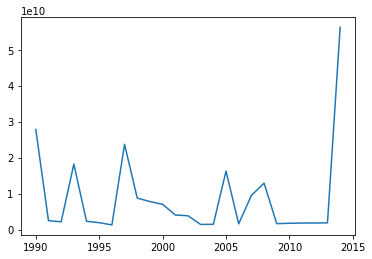

In [168]:
plt.figure()
plt.plot(years, sums)
plt.show()

In [0]:
pd_df = to_show.toPandas()

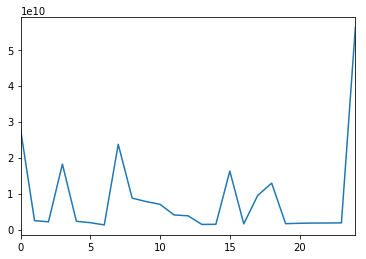

In [170]:
pd_df['sum(quantity)'].plot()

# Домашнее задание
- Скачайте dataset iris https://gist.github.com/netj/8836201
- Для каждого типа цветка определите максимальное, минимальное и среднее значение 4-х параметров
- Визуализируйте точечный график (plt.scatter) по каждой паре параметров
- Попробуйте отделить какой-нить тип цветка от всех остальных (сформулируйте правило на основе диаграммы - ЕСЛИ ЗНАЧЕНИЕ ПАРАМЕТРА X БОЛЬШЕ/МЕНЬШЕ Y, ТО ЦВЕТОК СКОРЕЕ ВСЕГО ОТНОСИТСЯ/НЕ ОТНОСИТСЯ К ТИПУ Z)
- Сделайте отдельную колонку для своего предсказания
- Оцените качество (сколько раз Вы угадали с ответом и сколько раз не угадали)